## Regresion Lineal:
<br>Modificar el script LinearRegressionDiabetes.py (\href http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) de forma que: <br>
<br>Ajustar una regresión utilizando todas las (10) variables.<br>
<br>Ajustar una regresión utilizando las (8) variables comprendidas entre la segunda y la anteúltima.<br>
<br>¿Cuál de estas dos regresiones ajusta mejor? ¿Qué modelo prefiere entre estos dos?<br>

In [4]:
import pandas as pd

#diabetes.DESCR

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['disease progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
#Use all (10) features and separate betwen train and test set.
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
seed = 104
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, diabetes_Y, test_size = 0.2, random_state = seed)
#Make the linear regression object and fit it to the train set.
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
#Predict and see scores.
diabetes_pred = regr.predict(x_test)
print('The coefficients are: \n {0}\n\n'.format(regr.coef_))
print('The mean squared error is: {0}\n'.format(mean_squared_error(y_test, diabetes_pred)))
print('The variance score is : {0}\n'.format(r2_score(y_test, diabetes_pred)))

The coefficients are: 
 [ -17.43992764 -222.28076153  565.50735481  306.2871376  -781.06326464
  483.36565804  138.13843392  191.52513149  728.52458089   45.79289919]


The mean squared error is: 2623.531621851309

The variance score is : 0.5620438671817144



In [10]:
y_train.shape

(353,)

<br>Usando el dataset $\textsf{Tips}$ (clase 3)<br>
<br>Ajustar una regresión lineal que modele la propina en función del precio de la comida, utilizando todos los datos.<br>

In [42]:
import pandas as pd
seed = 104
df_tips = pd.read_csv('tips.csv')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
#Pasando las variables que son categoricas a numéricas con label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
day_tidy = le.fit_transform(df_tips['day'])
smoker_tidy = le.fit_transform(df_tips['smoker'])
sex_tidy = le.fit_transform(df_tips['sex'])
time_tidy = le.fit_transform(df_tips['time'])

df_tips_tidy = pd.DataFrame({'total_bill':df_tips['total_bill'].ravel(), 'sex':sex_tidy, 'smoker':smoker_tidy, 'day':day_tidy, 'time':time_tidy, 'size':df_tips['size'].ravel()})
df_tips_tidy.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [43]:
#Usando todos los datos
xtrain, xtest, ytrain, ytest = train_test_split(df_tips_tidy, df_tips['tip'], test_size = 0.2, random_state = seed)
l_reg = linear_model.LinearRegression()
l_reg.fit(xtrain, ytrain)
preds = l_reg.predict(xtest)
print('The coefficients are: \n {0}\n\n'.format(l_reg.coef_))
print('The mean squared error is: {0}\n'.format(mean_squared_error(ytest, preds)))
print('The variance score is : {0}\n'.format(r2_score(ytest, preds)))


The coefficients are: 
 [ 0.09219328 -0.07445596 -0.06438951 -0.03282318  0.15072696  0.20018295]


The mean squared error is: 1.448375407010042

The variance score is : 0.4397424259436816



<br>Idem, pero utilizando solamente los datos de mujeres no fumadoras. ¿Qué modelo ajusta mejor?<br>

In [55]:
xtrain_, xtest_, ytrain_, ytest_ = train_test_split(df_tips_tidy[(df_tips_tidy['sex'] == 0) & (df_tips_tidy['smoker']== 0)].drop(['smoker', 'sex'], axis=1), df_tips[(df_tips['sex']=='Female') & (df_tips['smoker']=='No')]['tip'], test_size = 0.2, random_state = seed)
l_reg_ = linear_model.LinearRegression()
l_reg_.fit(xtrain_, ytrain_)
preds_ = l_reg_.predict(xtest_)
print('The coefficients are: \n {0}\n\n'.format(l_reg_.coef_))
print('The mean squared error is: {0}\n'.format(mean_squared_error(ytest_, preds_)))
print('The variance score is : {0}\n'.format(r2_score(ytest_, preds_)))

The coefficients are: 
 [ 0.09352195  0.05095763 -0.14606002  0.31916806]


The mean squared error is: 0.3494950493935287

The variance score is : 0.659062207433129



El modelo usando los datos de mujeres no fumadoras ajusta mejor a los datos ya que su $r^2$ es mejor, pero no es un modelo válido para predecir comportamientos de la clientela en general, ya que se desvió hacia un solo tipo de cliente ( mujeres no fumadoras ). En el caso en el que no se sepa si todos los clientes de una mesa son mujeres no fumadoras, este modelo no servira y se deberá usar el obtenido con los datos de todos los clientes.

<br>Utilizar la regresión anterior para enstimar la propina que deja una mujer no fumadora si la cuenta es de 20 pesos. <br>
<br>Supongo que el dia fue lunes, fue en la cena y fue solo ella a comer.<br>

In [74]:
#print(np.array(df_tips_tidy.columns.drop(['sex', 'smoker'])))
day = 2 #sunday (lunes)
time = 0 #dinner (cena)
size = 1
x = [20, day, time, size]
pred = np.dot([20, day, time, size], l_reg_.coef_)
print('La propina que dejó la mujer fue: {0}'.format(pred))

La propina que dejó la mujer fue: 2.291522406314992


<br> Usando el Dataset $\textsf{house\_prices}$ <br>

<br>Realizar un regresion lineal que permita estimar el precio de venta de la casa ('SalePrice') en base a la superficie total ('totSF') de la misma.
Realizar un gráfico donde figuren los datos originales y la recta hallada.
¿Ha encontrado una buena aproximacion lineal?<br>
<br>Realice una limpieza de los datos y repita el item anterior.<br>

In [99]:
df_houses = pd.read_csv('house_prices.csv')
print(df_houses[['totSF', 'SalePrice']])

    totSF  SalePrice
0    1444    -730000
1    1592      90000
2    1064      91000
3    1568      94000
4    1318      79000
5    1274      87300
6    1592      85000
7    1523      87000
8    1558      91000
9    1557      96500
10   1576     100000
11   1781     109500
12   1766     109500
13   1772     110000
14   1789     115000


El dato con precio negativo no tiene sentido, lo borro.

In [102]:
df_houses = df_houses.iloc[1:]
print(df_houses[['totSF', 'SalePrice']])

    totSF  SalePrice
2    1064      91000
3    1568      94000
4    1318      79000
5    1274      87300
6    1592      85000
7    1523      87000
8    1558      91000
9    1557      96500
10   1576     100000
11   1781     109500
12   1766     109500
13   1772     110000
14   1789     115000


The coefficient is: [61.67336354]

The mean squared error is: 9169754.843304893

The variance score is : 0.9638353227038808



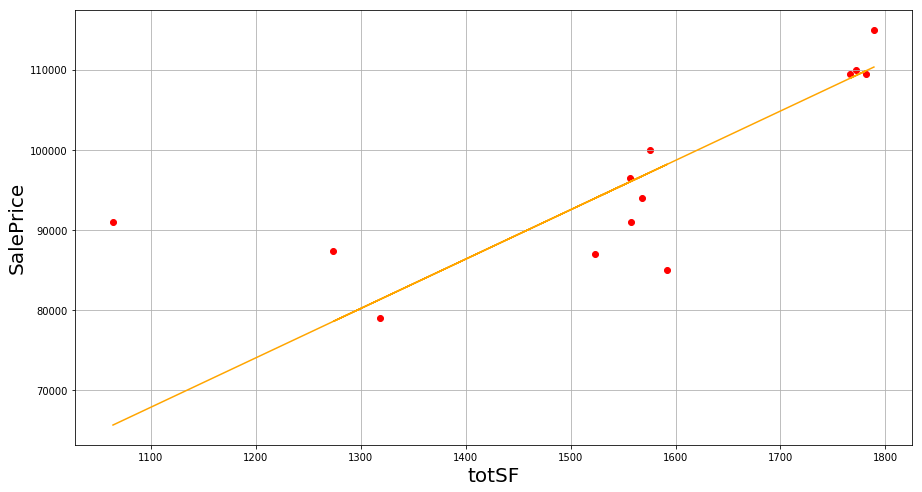

In [114]:
x = np.array(df_houses['totSF'])
y = np.array(df_houses['SalePrice'])

seed = 104
xh_train, xh_test, yh_train, yh_test = train_test_split(x, y, test_size = 0.2, random_state=seed)
lh_reg = linear_model.LinearRegression(fit_intercept=False)
lh_reg.fit(xh_train.reshape(-1,1), yh_train)
preds_h =  lh_reg.predict(xh_test.reshape(-1,1))

print('The coefficient is: {0}\n'.format(lh_reg.coef_))
print('The mean squared error is: {0}\n'.format(mean_squared_error(yh_test, preds_h)))
print('The variance score is : {0}\n'.format(r2_score(yh_test, preds_h)))

plt.figure(figsize=(15,8))
plt.scatter(x, y, color='red');
plt.plot(x, lh_reg.predict(x.reshape(-1,1)), color='orange');
plt.grid(True)
plt.xlabel('totSF', size=20);
plt.ylabel('SalePrice', size=20);

## Regresion Logistica:
<br> Usar el dataset de $\textsf{Breast Cancer}$ (clase 3) para ajustar el diagnóstico con una regresión logística utilizando una, otra y ambas variables $\textsf{radius\_mean} \textsf{concavity\_mean}$. ¿Cómo ajusta cada modelo?<br>


In [115]:
df_cancer = pd.read_csv('breast-cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [128]:
#Usando solamente radius mean
seed = 104
x = np.array(df_cancer['radius_mean']).reshape(-1,1)
y = np.array(df_cancer['diagnosis'])
log_reg = linear_model.LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
log_reg.fit(x_train, y_train)

print('The score of the model using only radius mean its : {0}'.format(log_reg.score(x_test, y_test)))

The score of the model using only radius mean its : 0.8771929824561403


In [127]:
#Usando solamente concavity mean
seed = 104
x = np.array(df_cancer['concavity_mean']).reshape(-1,1)
y = np.array(df_cancer['diagnosis'])
log_reg = linear_model.LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
log_reg.fit(x_train, y_train)

print('The score of the model using only concavity mean its : {0}'.format(log_reg.score(x_test, y_test)))

The score of the model using only concavity mean its : 0.7280701754385965


In [126]:
#Usando ambos features
seed = 104
x = np.array(df_cancer[['radius_mean', 'concavity_mean']])
y = np.array(df_cancer['diagnosis'])
log_reg = linear_model.LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
log_reg.fit(x_train, y_train)

print('The score of the model using both features its : {0}'.format(log_reg.score(x_test, y_test)))

The score of the model using both features its : 0.868421052631579
